In [93]:
using CSV
using DataFrames
reads = DataFrame(CSV.File("data/aapl.csv"))
appl=[]
for i in reads[:,6]
    push!(appl,i)
end
display(appl)

1259-element Array{Any,1}:
  33.380772
  33.262753
  33.196663
  33.253311
  33.942551
  34.018078
  33.973232
  33.909512
  33.918949
  34.171505
  33.994476
  33.909512
  33.833969
   â‹®
 163.169998
 159.300003
 157.440002
 162.949997
 158.520004
 154.729996
 150.619995
 155.089996
 159.589996
 160.619995
 163.979996
 165.380005

In [77]:
###Interpolate for day 31

###SOLVE RECRUSIVELY
#Call oslver which loops back through x days
#BREAK AT 1
function solver1(info,back)
    prev = 0.0
    if(size(info)[1]!=1)
        prev = solver(info[2:size(info)[1]],back+=1)
    else
        return info[1]
    end
    return (exp(-back)*info[1,1])+(exp(-back)*info[1,1])+prev
end
println("At 1262 / 3/22: ", solver1(appl[1:1259,6],0)-35.355)


At 1262 / 3/22: 81.78879470461197


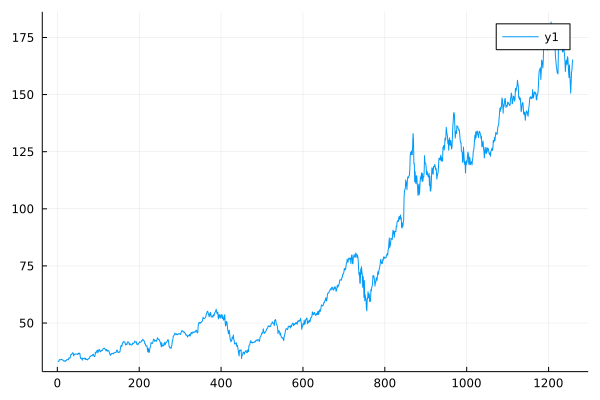

In [78]:
using Plots
plot([1:1259],appl[:,6])

In [83]:
###Interpolate for day 31

###SOLVE RECRUSIVELY
#Call oslver which loops back through x days
#BREAK AT 1
errs = []
function solver2(info,back)
    #println(back)
    prev = 0.0
    if(size(info)[1]!=1)
        prev = solver2(info[1:size(info)[1]-1],back+=1)
    else
        return info[1]
    end
    return (exp(-back)*info[size(info)[1],1])+(exp(-back)*(abs(prev-info[size(info)[1]-1,1])))+prev
end
println("At 1262 / 3/22: ", solver2(appl[1:1259,6],0))

At 1262 / 3/22: 179.14270883659674


In [84]:
#farthest back is largest number, i.e. 0th index is end of range-1
for i in 1:1259
   pred = solver(appl[1:i,6],0)
   pushfirst!(errs,pred-appl[i,6])
end

In [85]:
function fixedsolver(info,back)
    #println(back)
    prev = 0.0
    if(size(info)[1]!=1)
        prev = solver2(info[1:size(info)[1]-1],back+=1)
    else
        return info[1]
    end
    return (exp(-back)*info[size(info)[1],1])+((1/back)*(errs[back]))+prev
end
println("At 1262 / 3/22: ", fixedsolver(appl[1:1258,6],0))

At 1262 / 3/22: 164.85953223945515
